# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd

import numpy as np

%matplotlib inline

In [2]:
!ls

Cherry Blossoms.ipynb KyotoFullFlower7.xls


In [3]:
df = pd.read_excel("KyotoFullFlower7.xls")
df.shape

(1240, 6)

## 1. Read in the file using pandas, and look at the first five rows

In [4]:
type(pd.read_excel("KyotoFullFlower7.xls")) 

pandas.core.frame.DataFrame

## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [5]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [6]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [7]:
df["Reference Name"] = df["Reference Name"].replace(["-"], np.nan)

df["Reference Name"]

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
10                         NaN
11                  NIHON-KOKI
12                         NaN
13                         NaN
14                  NIHON-KOKI
15                         NaN
16                         NaN
17                         NaN
18                         NaN
19                         NaN
20                         NaN
21                         NaN
22                         NaN
23                         NaN
24                         NaN
25                         NaN
26                         NaN
27                         NaN
28                         NaN
29                         NaN
                 ...          
1185    NEWS-PAPER(ARASHIYAMA)
1186    

## 4. What source is the most common as a reference?

In [8]:
df["Reference Name"].value_counts()

NEWS-PAPER(ARASHIYAMA)              94
SUGIURAKE-NIKKI                     38
MYOHOIN-HINAMIKI                    32
OYUDONONO-UENO-NIKKI                26
DAIGOJI-ZATSUYO                     21
OYUDONONO-UENO-NIKKI [EDA]          21
SANETAKA-KOKI                       19
NIHONKIRYAKU                        19
(SHIRYO-SORAN)                      15
KAKUMEIKI                           15
ZOKU-SHIGUSHO                       14
NISUIKI                             13
INRYOGEN-NICHIROKU                  13
MEIGETSUKI                          12
GUKANKI                             10
GIENJUNKO-NIKKI(DAIGO)              10
KEIHAN RAILWAY ADV(ARASHIYAMA)       9
MOTOHIRO-KOKI                        9
DAIGO-ZOJIKI                         9
KANMON-GYOKI(FUSHIMI)                9
MANZAIJUNGO-NIKKI(DAIGO)             8
TOKITSUGU-KYOKI                      8
TAKAGI-ZAICHU-NIKKI                  8
HANAZONOTENNO-SHINKI                 8
RAI-SANYO-NIPPU                      8
TERUYOSHI-KOKI           

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [9]:
df["Full-flowering date (DOY)"].isna()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11      False
12       True
13       True
14      False
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
1190    False
1191    False
1192    False
1193    False
1194    False
1195    False
1196    False
1197    False
1198    False
1199    False
1200    False
1201    False
1202    False
1203    False
1204    False
1205    False
1206    False
1207    False
1208    False
1209    False
1210    False
1211    False
1212    False
1213    False
1214    False
Name: Full-flowering date (DOY), Length: 1215, dtype: bool

In [10]:
df["Full-flowering date (DOY)"].isna().sum() #True Nan 

388

In [11]:
df = df.dropna(subset=["Full-flowering date (DOY)"])

In [12]:
df["Full-flowering date (DOY)"].isna()

11      False
14      False
30      False
50      False
52      False
63      False
65      False
68      False
88      False
90      False
91      False
93      False
94      False
95      False
101     False
107     False
111     False
112     False
116     False
122     False
125     False
129     False
132     False
140     False
148     False
149     False
154     False
156     False
157     False
158     False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
1190    False
1191    False
1192    False
1193    False
1194    False
1195    False
1196    False
1197    False
1198    False
1199    False
1200    False
1201    False
1202    False
1203    False
1204    False
1205    False
1206    False
1207    False
1208    False
1209    False
1210    False
1211    False
1212    False
1213    False
1214    False
Name: Full-flowering date (DOY), Length: 827, dtype: bool

## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

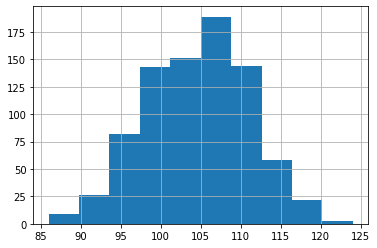

In [13]:
df["Full-flowering date (DOY)"].hist(bins=10)

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

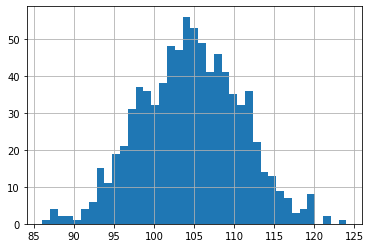

In [14]:
df["Full-flowering date (DOY)"].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [15]:
df["Full-flowering date"].mean()

413.71704957678355

In [16]:
df["Full-flowering date"].count()

827

In [17]:
df.loc[df["AD"] > 1900,["Full-flowering date"]]["Full-flowering date"].mean()


409.44642857142856

In [18]:
df[df["AD"] > 1900]["Full-flowering date"].mean()


409.44642857142856

## 11. How about after 1900?

In [19]:
df[df["AD"] < 1900]["Full-flowering date"].mean()

414.3893557422969

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [20]:
df[df["Data type code"] == 4.0].count()

AD                           39
Full-flowering date (DOY)    39
Full-flowering date          39
Source code                  39
Data type code               39
Reference Name               39
dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [21]:
df["AD"],[["Data type code"] == 4.0]

(11       812
 14       815
 30       831
 50       851
 52       853
 63       864
 65       866
 68       869
 88       889
 90       891
 91       892
 93       894
 94       895
 95       896
 101      902
 107      908
 111      912
 112      913
 116      917
 122      923
 125      926
 129      930
 132      933
 140      941
 148      949
 149      950
 154      955
 156      957
 157      958
 158      959
         ... 
 1185    1986
 1186    1987
 1187    1988
 1188    1989
 1189    1990
 1190    1991
 1191    1992
 1192    1993
 1193    1994
 1194    1995
 1195    1996
 1196    1997
 1197    1998
 1198    1999
 1199    2000
 1200    2001
 1201    2002
 1202    2003
 1203    2004
 1204    2005
 1205    2006
 1206    2007
 1207    2008
 1208    2009
 1209    2010
 1210    2011
 1211    2012
 1212    2013
 1213    2014
 1214    2015
 Name: AD, Length: 827, dtype: int64, [False])

## 14. Graph the full-flowering date (DOY) over time

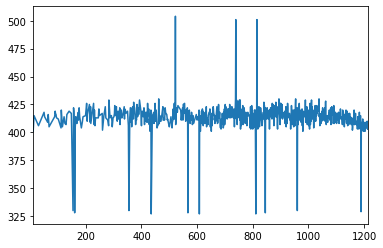

In [22]:
df["Full-flowering date"].plot()


## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [23]:
df.rolling(20, on="AD", min_periods=5)["Full-flowering date (DOY)"].mean().tail(5)

1210    96.45
1211    96.80
1212    96.60
1213    96.35
1214    96.05
Name: Full-flowering date (DOY), dtype: float64

In [24]:
df["rolling_date"] = df.rolling(20, on="AD", min_periods=5)["Full-flowering date (DOY)"].mean().tail(5)

In [25]:
#import matplotlib.pyplot as plt
#import math
#df["rolling_date"].plt.ylim(80, 120)

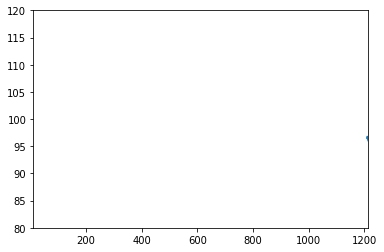

In [26]:
df["rolling_date"].plot(x= "AD", y= "Full-flowering date (DOY)", ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [27]:
df.loc[df["Full-flowering date"] < 400, "month"] = "March"
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,NaN
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,NaN
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,NaN
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,NaN
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,NaN
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,NaN
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,NaN
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,NaN,NaN
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,NaN
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,NaN,NaN


In [36]:
df.loc[df["Full-flowering date"].between(400,500), "month"] = "April"
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,April
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,April
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,NaN,April
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,April
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,NaN,April


In [60]:
df.loc[df["Full-flowering date"] < 600, "month"] = "May"
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,May
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,May
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,May
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,May
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,May
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,May
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,May
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,NaN,May
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,NaN,May
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,NaN,May


# 17. Using your new column, how many blossomings happened in each month?

In [63]:
df[df["Full-flowering date"] < 400]["month"].count() 

10

In [64]:
df.loc[df["Full-flowering date"].between(400,500) , "month"].count() 

814

In [65]:
df.loc[df["Full-flowering date"] < 600, "month"].count()

827

### 18. Graph how many blossomings happened in each month.

In [68]:
df["Full-flowering date].value_counts().plot(kind='bar')

SyntaxError: EOL while scanning string literal (<ipython-input-68-a23cd415338b>, line 1)

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [34]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [35]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + "!!!").head()

11    4!!!
14    4!!!
30    4!!!
50    4!!!
52    4!!!
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

# YOU ARE DONE.

And **incredible.**